# 💻 Praktikum 2
Klasifikasi SVM dengan Data Dummy Non-Linier

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 1c - Buat Data Dummy Non-Linier

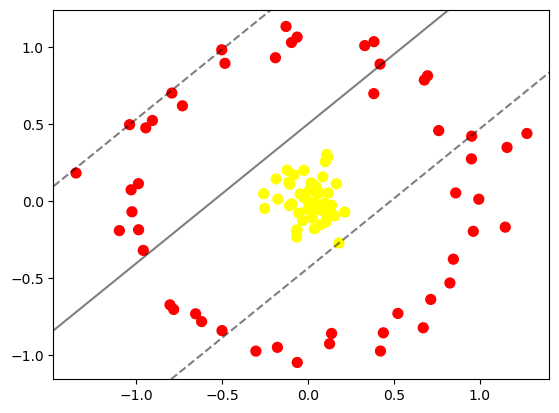

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    # compute radial feature for the third axis
    r = np.exp(-(X[:, 0]**2 + X[:, 1]**2))
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.09763984, -0.19055828],
       [ 0.67137347, -0.82248191],
       [ 0.38448714,  1.03768558],
       [-0.11073676,  0.12363058],
       [ 0.33092611,  1.01228537],
       [ 0.71523798, -0.63814172],
       [ 0.03757609, -0.17908866],
       [ 1.14885032, -0.1681387 ],
       [-0.04474101,  0.04690458],
       [ 0.05304834, -0.02856755],
       [-0.78125913, -0.70324459],
       [ 0.10958118,  0.30430711],
       [-0.12046866,  0.202235  ],
       [-0.09306718, -0.016431  ],
       [ 0.41996595,  0.89186155],
       [ 0.86056303,  0.05426116],
       [ 0.12627326, -0.92656273],
       [ 1.27514665,  0.44080369],
       [-0.06719488, -0.18999025],
       [ 0.01828839,  0.11882362],
       [-0.95828209, -0.31923117],
       [-0.94379887,  0.47748053],
       [-0.4829667 ,  0.89688562],
       [ 0.00336926, -0.0046537 ],
       [ 0.42253405, -0.97378225],
       [-0.12722365,  1.13660734],
       [ 0.43927463, -0.85523459],
       [

## Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

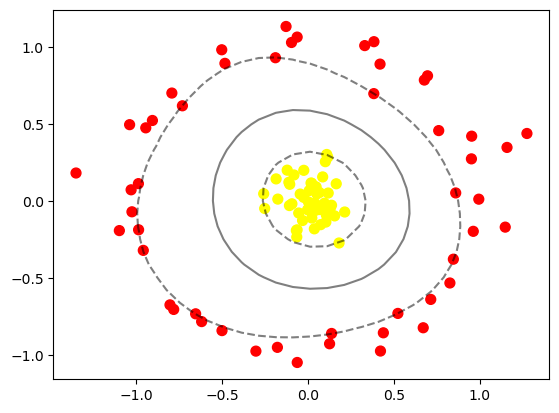

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')